In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import pathlib

%matplotlib inline
%load_ext autoreload
%autoreload 2

First, we will import the 2014 CDC raw data file.

In [2]:
data_folder = Path('./data/raw')
year = '2004'

data_file = data_folder / year / 'natl2004.csv'

The CSV is very large, therefore we will only load certain columns. The columns names are listed in the description pdf. These are the ones we will use:
* **dob_yy**: date of birth year
* **dob_mm**: date of birth month
* **dob_wk**: date of birth weekdat
* **ostate**: occurrence state
* **mrstate**: mother's resident state
* **ocntyfips**: occurrence county FIPS code
* **ocntypop**: occurrence county population range
* **mrecntyfips**: mother's resident county
* **msa**: metropolitan statistical area
* **msa_pop**: population of statistical area
* **mrcityfips**: mother's place of residence (city)
* **estgest**: estimated gestation, in weeks

In [3]:
# create the list of columns we want to load
col_load = ['dob_yy','dob_mm','dob_wk',
            'ostate','mrstate',
            'ocntyfips','ocntypop', 
            'mrcntyfips',
#             'msa','msa_pop', 'mrcityfips', 
            'estgest']

# load the csv
df = pd.read_csv(data_file, usecols=col_load,)

In [4]:
# use df.head() to get a rough view of what the dataframe look likes
df.head() 

,dob_yy,dob_mm,dob_wk,ostate,ocntyfips,ocntypop,mrstate,mrcntyfips,estgest
0,2004.0,1.0,2.0,AK,20.0,2.0,AK,20.0,40.0
1,2004.0,1.0,7.0,AK,999.0,9.0,AK,999.0,39.0
2,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,41.0
3,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,41.0
4,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,40.0


We'll be using the 'mrstate' category, lets see what's in there, since there are some interesting values...

In [5]:
pd.value_counts(df['mrstate'])

CA    544843
TX    381293
NY    249947
FL    218053
IL    180778
OH    148954
PA    144748
GA    138849
MI    129776
NC    119847
NJ    115253
VA    103933
AZ     93663
IN     87142
WA     81747
TN     79642
MA     78484
MO     77765
MD     74628
MN     70624
WI     70146
CO     68503
LA     65369
AL     59510
SC     56590
KY     55720
OK     51306
UT     50670
OR     45678
MS     42827
CT     42095
KS     39669
AR     38573
IA     38438
NV     35200
NM     28384
NE     26332
ID     22532
WV     20880
HI     18281
NH     14565
ME     13944
RI     12779
MT     11519
DE     11369
SD     11338
AK     10338
ND      8189
DC      7933
WY      6807
VT      6599
MX      5784
ZZ       610
XX       307
CC       113
PR        19
VI        19
CU         2
GU         1
Name: mrstate, dtype: int64

In [6]:
# I want to find all the columns that have NaNs in them
# we can use isnull, combined with sum
# this sums up all the NaNs in each column
df.isnull().sum()

dob_yy        184
dob_mm        184
dob_wk        184
ostate        184
ocntyfips     184
ocntypop      184
mrstate       184
mrcntyfips    184
estgest       184
dtype: int64

In [7]:
# look to see what the rows look like that have NaNs in them
df[df.isnull().any(axis=1)]

,dob_yy,dob_mm,dob_wk,ostate,ocntyfips,ocntypop,mrstate,mrcntyfips,estgest
2134535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2149190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2149484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2150163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2150598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3107711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3107719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3107740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3107742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df.shape)
df = df.dropna()
print(df.shape)

(4119091, 9)
(4118907, 9)


We need to match the 'ostate' and 'mrstate' with the FIPS State Code. We can get the FISP codes from [census.gov](https://www.census.gov/geographies/reference-files/2017/demo/popest/2017-fips.html).

In [9]:
# load 'all-geocodes-v2017.xlsx'
df_fips = pd.read_excel('./other_data/all-geocodes-v2017.xlsx', 
                        skiprows=4, 
                        dtype={'State Code (FIPS)': float, 
                               'County Code (FIPS)': float, 
                               'County Subdivision Code (FIPS)': float, 
                               'Place Code (FIPS)': float, 
                               'Consolidtated City Code (FIPS)': float})

df_fips.head()

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
0,10,0.0,0.0,0.0,0.0,0.0,United States
1,40,1.0,0.0,0.0,0.0,0.0,Alabama
2,50,1.0,1.0,0.0,0.0,0.0,Autauga County
3,50,1.0,3.0,0.0,0.0,0.0,Baldwin County
4,50,1.0,5.0,0.0,0.0,0.0,Barbour County


We also need to get the state abbreviations. Google state abbreviations, and copy the list into a csv.

In [10]:
# load 'state_abbreviations.csv'
df_abbr = pd.read_csv('./other_data/state_abbreviations.csv',header=None, names=['state','abbr'])
df_abbr.head()

,state,abbr
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR


Next, we will add the 'state' name to the df.

In [11]:
# use pandas merge. Also, dorp the 'abbr' columns right away
df = pd.merge(df, df_abbr, left_on='mrstate',right_on='abbr', how='inner', copy=False).drop(['abbr'], axis=1)
df = df.rename(columns={'state':'state_name_mr'})
df.head()

,dob_yy,dob_mm,dob_wk,ostate,ocntyfips,ocntypop,mrstate,mrcntyfips,estgest,state_name_mr
0,2004.0,1.0,2.0,AK,20.0,2.0,AK,20.0,40.0,Alaska
1,2004.0,1.0,7.0,AK,999.0,9.0,AK,999.0,39.0,Alaska
2,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,41.0,Alaska
3,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,41.0,Alaska
4,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,40.0,Alaska


In [12]:
# use pandas merge. Also, dorp the 'abbr' columns right away
df = pd.merge(df, df_abbr, left_on='ostate',right_on='abbr', how='inner', copy=False).drop(['abbr'], axis=1)
df = df.rename(columns={'state':'state_name_oc'})
df.head()

,dob_yy,dob_mm,dob_wk,ostate,ocntyfips,ocntypop,mrstate,mrcntyfips,estgest,state_name_mr,state_name_oc
0,2004.0,1.0,2.0,AK,20.0,2.0,AK,20.0,40.0,Alaska,Alaska
1,2004.0,1.0,7.0,AK,999.0,9.0,AK,999.0,39.0,Alaska,Alaska
2,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,41.0,Alaska,Alaska
3,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,41.0,Alaska,Alaska
4,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,40.0,Alaska,Alaska


We will add the State FIPS code next.

In [13]:
# use pandas merge.
df = pd.merge(df, 
         df_fips, 
         left_on='state_name_mr',
         right_on='Area Name (including legal/statistical area description)', 
         how='inner', 
         copy=False)

# the columns we will drop from the merged df -- these columns are from the df_fips
list_to_drop = ['Summary Level',
                'County Code (FIPS)',
                'County Subdivision Code (FIPS)',
                'Place Code (FIPS)',
                'Consolidtated City Code (FIPS)',
                'Area Name (including legal/statistical area description)']

df = df.drop(list_to_drop, axis=1)
df = df.rename(columns={'State Code (FIPS)':'state_fips_mr'})
df.head()

,dob_yy,dob_mm,dob_wk,ostate,ocntyfips,ocntypop,mrstate,mrcntyfips,estgest,state_name_mr,state_name_oc,state_fips_mr
0,2004.0,1.0,2.0,AK,20.0,2.0,AK,20.0,40.0,Alaska,Alaska,2.0
1,2004.0,1.0,7.0,AK,999.0,9.0,AK,999.0,39.0,Alaska,Alaska,2.0
2,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,41.0,Alaska,Alaska,2.0
3,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,41.0,Alaska,Alaska,2.0
4,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,40.0,Alaska,Alaska,2.0


In [14]:
# use pandas merge.
df = pd.merge(df, 
         df_fips, 
         left_on='state_name_oc',
         right_on='Area Name (including legal/statistical area description)', 
         how='inner', 
         copy=False)

# the columns we will drop from the merged df -- these columns are from the df_fips
list_to_drop = ['Summary Level',
                'County Code (FIPS)',
                'County Subdivision Code (FIPS)',
                'Place Code (FIPS)',
                'Consolidtated City Code (FIPS)',
                'Area Name (including legal/statistical area description)']

df = df.drop(list_to_drop, axis=1)
df = df.rename(columns={'State Code (FIPS)':'state_fips_oc'})
df.head()

,dob_yy,dob_mm,dob_wk,ostate,ocntyfips,ocntypop,mrstate,mrcntyfips,estgest,state_name_mr,state_name_oc,state_fips_mr,state_fips_oc
0,2004.0,1.0,2.0,AK,20.0,2.0,AK,20.0,40.0,Alaska,Alaska,2.0,2.0
1,2004.0,1.0,7.0,AK,999.0,9.0,AK,999.0,39.0,Alaska,Alaska,2.0,2.0
2,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,41.0,Alaska,Alaska,2.0,2.0
3,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,41.0,Alaska,Alaska,2.0,2.0
4,2004.0,1.0,5.0,AK,20.0,2.0,AK,999.0,40.0,Alaska,Alaska,2.0,2.0


We have a lot of what we want. We can now do some simple plotting of the number of births.

In [15]:
# see how many births there are. This will be the length of the df
len(df)

4141914

We'll save the df to a csv, with compression, so that we can load the data later and not have to do all the preprocessing work.

In [16]:
# https://stackoverflow.com/a/46073397/9214620
df.to_csv('2004_birth_state.csv.gz', compression='gzip', index=False)

# to load, use pd.read_csv('2004_birth_state.csv.gz', compression='gzip')

Use groupby to see how many babies are born in each state.

In [17]:
df.groupby(['state_name_mr'], as_index=False).count().head()

,state_name_mr,dob_yy,dob_mm,dob_wk,ostate,ocntyfips,ocntypop,mrstate,mrcntyfips,estgest,state_name_oc,state_fips_mr,state_fips_oc
0,Alabama,59510,59510,59510,59510,59510,59510,59510,59510,59510,59510,59510,59510
1,Alaska,10338,10338,10338,10338,10338,10338,10338,10338,10338,10338,10338,10338
2,Arizona,93663,93663,93663,93663,93663,93663,93663,93663,93663,93663,93663,93663
3,Arkansas,38573,38573,38573,38573,38573,38573,38573,38573,38573,38573,38573,38573
4,California,544844,544844,544844,544844,544844,544844,544844,544844,544844,544844,544844,544844


Do the groupby again, but only keep the 'stat' and 'dob_yy' column. We will rename the 'dob_yy' column.

In [18]:
df_birth_state = df.groupby(['state_name_mr'], as_index=False).count()[['state_name_mr','dob_yy']]
df_birth_state.head()

,state_name_mr,dob_yy
0,Alabama,59510
1,Alaska,10338
2,Arizona,93663
3,Arkansas,38573
4,California,544844


In [19]:
# rename dob_yy to count
df_birth_state = df_birth_state.rename(columns={'dob_yy':'count', 'state_name_mr':'state'})
df_birth_state.head()

,state,count
0,Alabama,59510
1,Alaska,10338
2,Arizona,93663
3,Arkansas,38573
4,California,544844


Now we will make a bar chart of sorts.

The easiest is to use matplotlib to get a simple bar chart. After that, we will use seaborn to make a prettier one.

<BarContainer object of 52 artists>

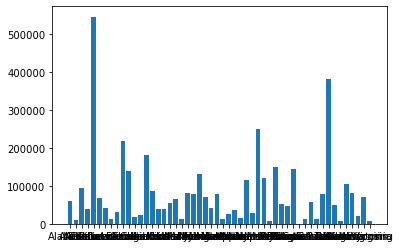

In [20]:
plt.bar(df_birth_state['state'],df_birth_state['count'])

That's good, but it is very compact. Let's use the subplots and define the figsize.

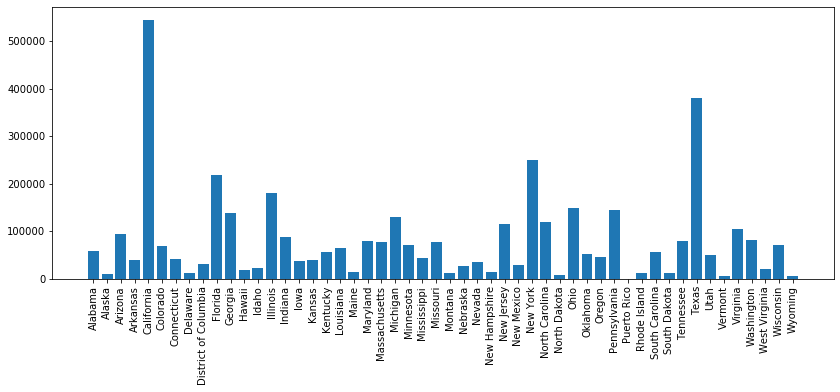

In [21]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

ax.bar(df_birth_state['state'],df_birth_state['count'])
plt.xticks(rotation=90) # rotate the x-ticks
plt.show()

Seaborn is a visually pleasing plotting library, built on matplotlib and pandas.

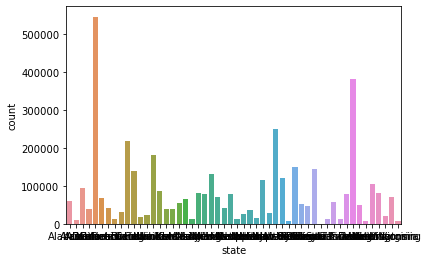

In [22]:
import seaborn as sns

sns.barplot(x='state',y='count',data=df_birth_state)

Spruce up the plot again.

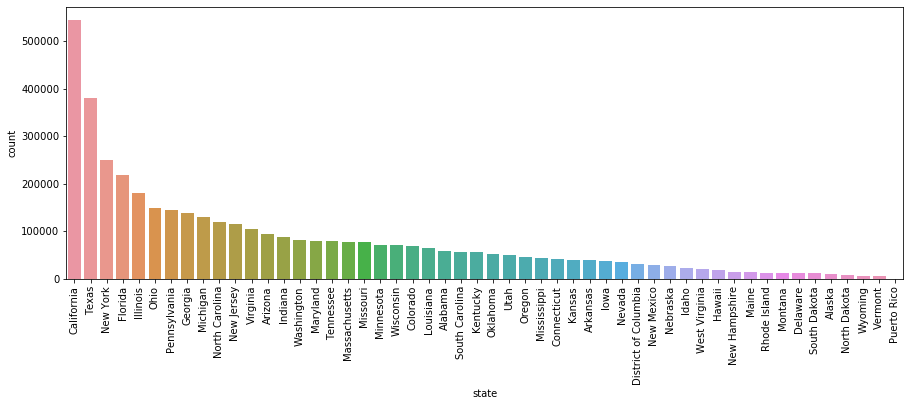

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

ax = sns.barplot(x='state',y='count',data=df_birth_state.sort_values(by='count',ascending=False))
plt.xticks(rotation=90) # rotate the x-ticks
plt.show()

In [24]:
# make sorted df the default
df_birth_state = df_birth_state.sort_values(by='count',ascending=False)
df_birth_state.head()

,state,count
4,California,544844
44,Texas,381295
32,New York,249956
9,Florida,218058
13,Illinois,180778


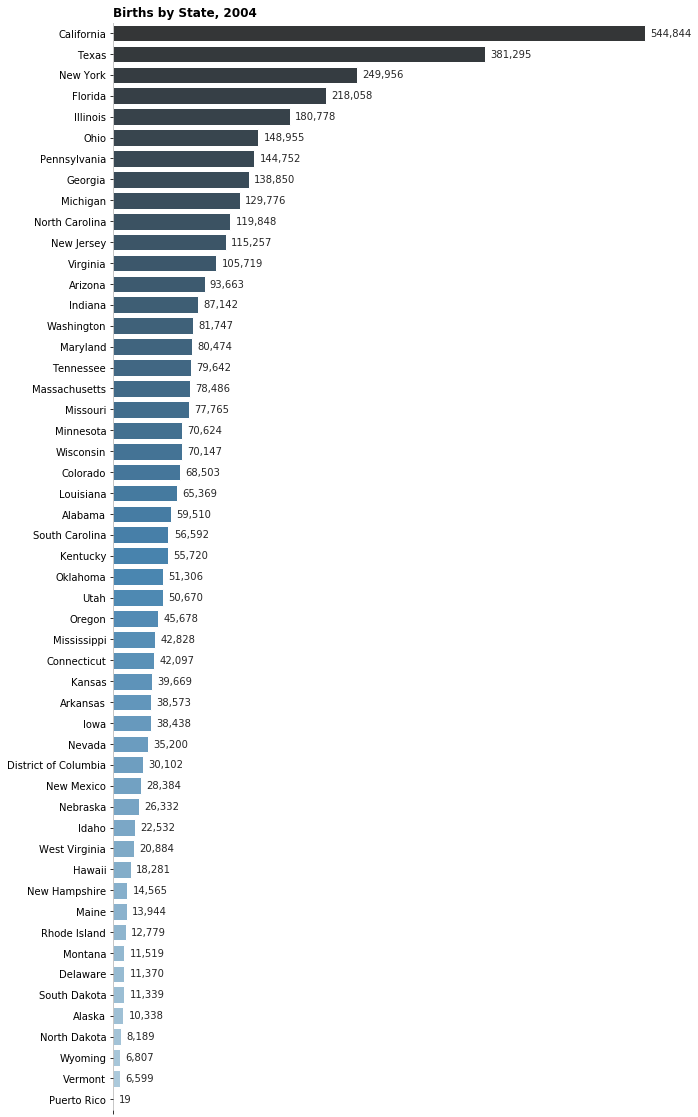

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,20),)

max_pop = df_birth_state['count'].max()

sns.set(font_scale=1.0,style='whitegrid')
ax = sns.barplot("count", y="state", data=df_birth_state, palette="Blues_d",)
for p in ax.patches:
    # help from https://stackoverflow.com/a/56780852/9214620
    space = max_pop*0.01
    _x = p.get_x() + p.get_width() + float(space)
    _y = p.get_y() + p.get_height()/2
    value = p.get_width()
    ax.text(_x, _y, '{0:,.0f}'.format(value), ha="left",va='center',weight='normal',size=10, )

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.set_ylabel('')  
ax.set_xlabel('')  
ax.grid(alpha=0.7,linewidth=1,axis='x')
ax.set_xticks([0])
ax.set_xticklabels([])
plt.title('Births by State, 2004',loc='left', weight='semibold')

sns.despine(left=True, bottom=True)
# plt.savefig('births_state.png',dpi=600,bbox_inches = "tight")
plt.show()

Awesome! Now we have a nice, visually pleasing, chart that you can see and easily tell which state has the most births.